In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
beer = pd.read_csv('../data/cleaned_beer.csv')
#read in cleaned data

In [3]:
beer.head(1)
#check it was read in correctly

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
0,Shiner Bock,Spoetzl Brewery,"Texas, United States",Bock,96,4.5,74.0,27967,3.21,19.63,1234,4564,Active,1999-10-03,Bock,October,Sunday,1999


In [4]:
beer.shape
#check for dimensions

(11916, 18)

In [5]:
beer.describe()
#interests: score (min and max, avg), trends of ratings and reviews, abv(any trend in abv)

,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,year_added
count,11916.000000,11803.000000,10294.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000
mean,77.470376,6.548507,84.974063,9236.367909,3.757059,11.510625,134.023414,438.110692,2010.789778
std,226.214368,2.526233,7.234911,10725.568757,0.409254,5.786765,311.901344,1080.215305,6.106004
min,0.000000,0.010000,43.000000,0.000000,1.410000,0.000000,0.000000,1.000000,1996.000000
25%,0.000000,5.000000,82.000000,0.000000,3.580000,8.307500,8.000000,26.000000,2005.000000
50%,8.000000,6.000000,86.000000,2308.500000,3.800000,10.900000,32.000000,99.000000,2012.000000
75%,71.000000,7.500000,89.000000,19882.000000,4.010000,13.610000,109.000000,342.000000,2015.000000
max,3553.000000,67.500000,100.000000,28885.000000,5.000000,58.060000,4157.000000,17944.000000,2024.000000


In [6]:
beer['date_added'].max() # looking at my date ranges

'2024-02-19'

In [7]:
beer['date_added'].min()

'1996-08-22'

In [8]:
beer['type_'].value_counts() # 14 types of beers, and each had different numbers of sub types; pale lager has more substypes


type_
Pale Lager        1500
Pale Ale          1400
Specialty Beer    1200
Strong Ale        1200
Wild/Sour Beer    1016
Dark Lager         900
India Pale Ale     800
Stout              800
Wheat Beer         700
Porter             600
Bock               500
Brown Ale          500
Dark Ale           400
Hybrid Beer        400
Name: count, dtype: int64

In [9]:
beer['sub_type'].value_counts().head()

sub_type
Bock                      100
Japanese Rice Lager       100
Oatmeal Stout             100
Irish Dry Stout           100
Foreign / Export Stout    100
Name: count, dtype: int64

In [10]:
beer['sub_type'].value_counts().tail(5)#since there were 120 subtypes, expected to get 12000 rows. this did not happen because faro only had 16 elements in entire category 


sub_type
New England IPA    100
Milkshake IPA      100
Imperial IPA       100
Wild Ale           100
Faro                16
Name: count, dtype: int64

##### Starting to look into trends of how people review on this site:

In [11]:
beer['reviews'].max() #what beer has the most reviews?

4157

In [12]:
beer.loc[beer['reviews']==4157] #despite the fact that there are more pale lagers and pale ales, a stout has top reviews and a perfect score

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
8700,Breakfast Stout,Founders Brewing Company,"Michigan, United States",Oatmeal Stout,2,8.3,100.0,153,4.51,9.09,4157,17944,Active,2003-07-27,Stout,July,Sunday,2003


In [13]:
beer['reviews'].min()

0

In [14]:
beer.loc[(beer['reviews']==0) & (beer['score']>1) ] # in the cleaning process, 0 were added to Na values assuming there wouldn't be a score 
#there is a score so number of ratings also play a role even with out reviews present

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
2055,Eldir,Banded Brewing Co.,"Maine, United States",Rauchbier,37,5.60,88.0,13417,3.97,14.11,0,21,Active,2014-04-28,Dark Lager,April,Monday,2014
2083,Rauchbier,Liquid Riot Bottling Company,"Maine, United States",Rauchbier,0,4.70,87.0,0,3.85,9.87,0,12,Active,2013-07-08,Dark Lager,July,Monday,2013
2091,Kaiser Rauchtenstein Dry-hopped Smoked Helles,Haymarket Beer Co. Pub & Brewery,"Illinois, United States",Rauchbier,0,4.50,87.0,0,3.83,8.62,0,11,Active,2014-08-01,Dark Lager,August,Friday,2014
2428,Kotbusser,Rapp Brewing Company,"Florida, United States",Braggot,0,6.10,86.0,0,3.74,8.82,0,14,Active,2014-03-02,Hybrid Beer,March,Sunday,2014
2430,Belgian Style Texas Honey Ale,Guadalupe Brewing Co.,"Texas, United States",Braggot,0,7.75,87.0,0,3.85,4.16,0,13,Active,2014-01-12,Hybrid Beer,January,Sunday,2014
6096,Cold Pixel,Phase Three Brewing Company,"Illinois, United States",India Pale Lager (IPL),0,6.50,88.0,0,3.93,3.31,0,10,Active,2021-11-17,Pale Lager,November,Wednesday,2021
6871,Nightfall Robust Porter,First Magnitude Brewing Company,"Florida, United States",Robust Porter,0,6.60,87.0,0,3.89,5.14,0,10,Active,2014-12-14,Porter,December,Sunday,2014
7053,En Verano,Finback Brewery,"New York, United States",Chile Beer,0,5.00,89.0,0,4.00,11.00,0,30,Active,2014-07-16,Specialty Beer,July,Wednesday,2014
7068,Jalapeño Rye,Big aLICe Brewing,"New York, United States",Chile Beer,0,7.10,84.0,0,3.63,11.02,0,22,Active,2015-03-30,Specialty Beer,March,Monday,2015
8178,Gratz,Night Shift Brewing,"Massachusetts, United States",Smoked Beer,0,3.00,84.0,0,3.61,19.39,0,14,Active,2016-10-09,Specialty Beer,October,Sunday,2016


In [15]:
beer['ratings'].max()

17944

In [16]:
beer.loc[beer['ratings']==17944] # same as max reveiws

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
8700,Breakfast Stout,Founders Brewing Company,"Michigan, United States",Oatmeal Stout,2,8.3,100.0,153,4.51,9.09,4157,17944,Active,2003-07-27,Stout,July,Sunday,2003


In [17]:
# beer.plot(kind = 'scatter',
#              x = 'score',
#              y = 'reviews',
#              figsize = (10,6));
#best represented with a dif visual, but did help gain direction

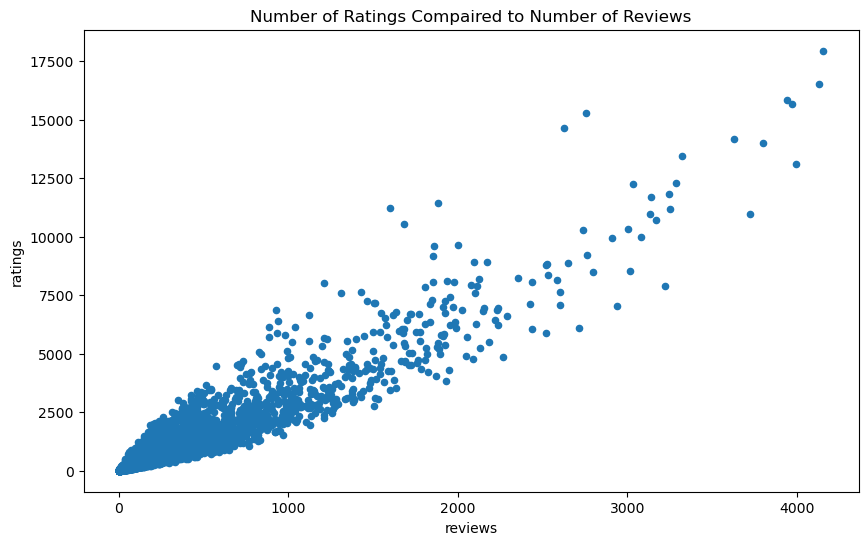

In [18]:
beer.plot(kind = 'scatter',
             x = 'reviews',
             y = 'ratings',
             figsize = (10,6))
plt.title('Number of Ratings Compaired to Number of Reviews');
# general pattern, the more reviews on a beer the more ratings on it as well

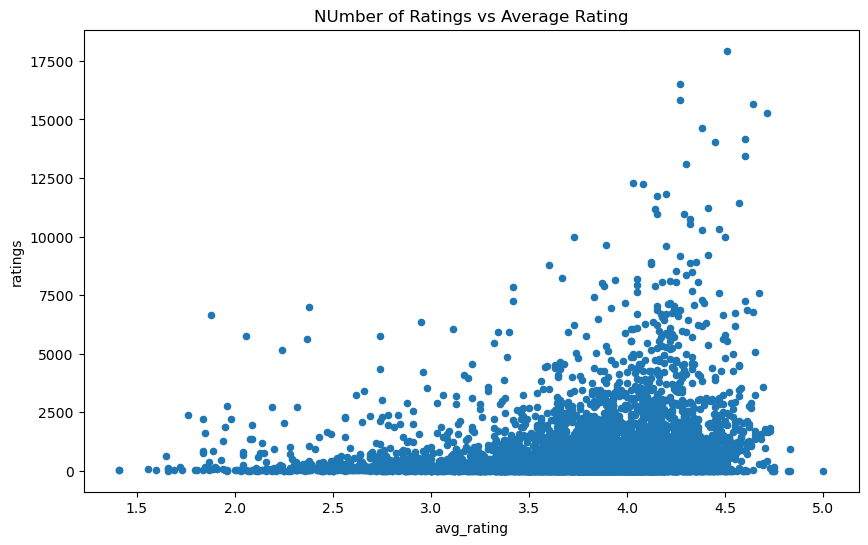

In [19]:
beer.plot(kind = 'scatter',
             x = 'avg_rating',
             y = 'ratings',
             figsize = (10,6));
plt.title('NUmber of Ratings vs Average Rating');

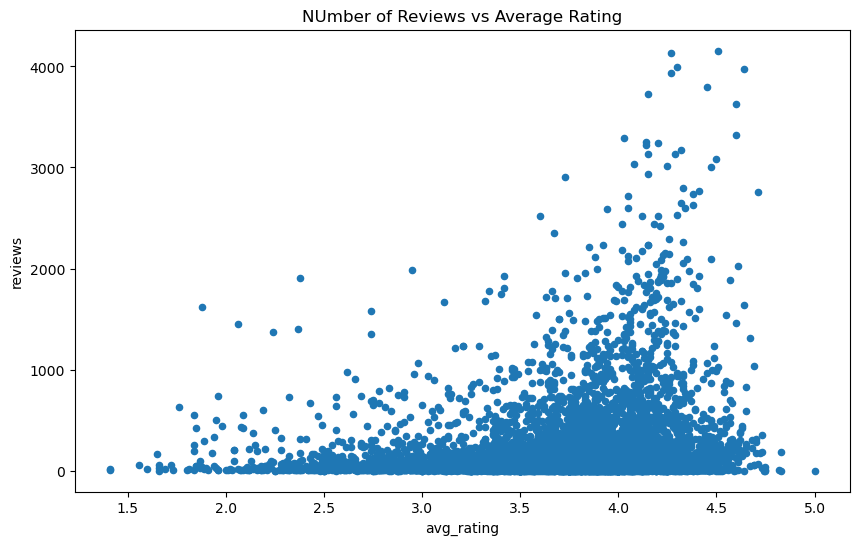

In [20]:
beer.plot(kind = 'scatter',
             x = 'avg_rating',
             y = 'reviews',
             figsize = (10,6))
plt.title('NUmber of Reviews vs Average Rating');

In [21]:
med_amount_rating_by_score=beer.groupby(['score'])['ratings'].median()##chose medain because mean is pretty skewed
med_amount_rating_by_score = pd.DataFrame(med_amount_rating_by_score).reset_index()

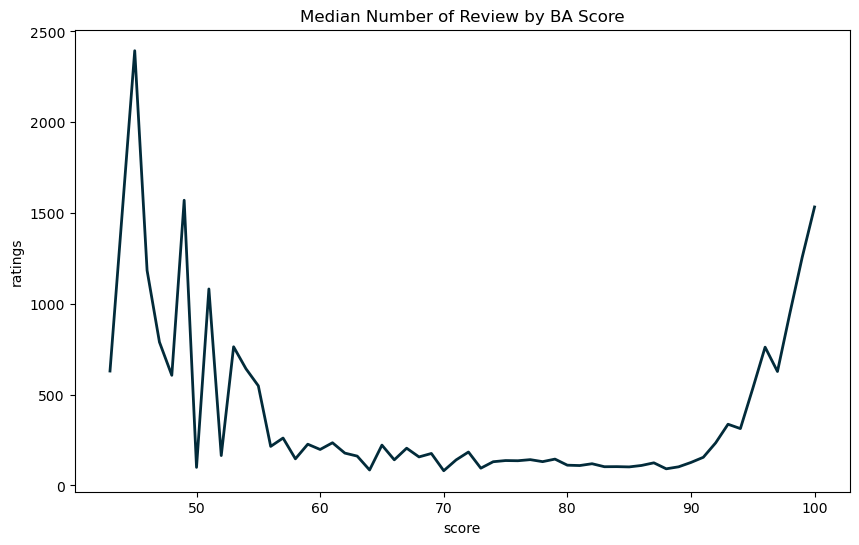

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=med_amount_rating_by_score, x='score', y='ratings', color='#022B3A', linewidth=2)
plt.title('Median Number of Review by BA Score');
# typically, the amount of raitings spike when the beer is really good or really bad below 50 or above 95

In [23]:
med_amount_rev_by_score=beer.groupby(['score'])['reviews'].median()
med_amount_rev_by_score = pd.DataFrame(med_amount_rev_by_score).reset_index()

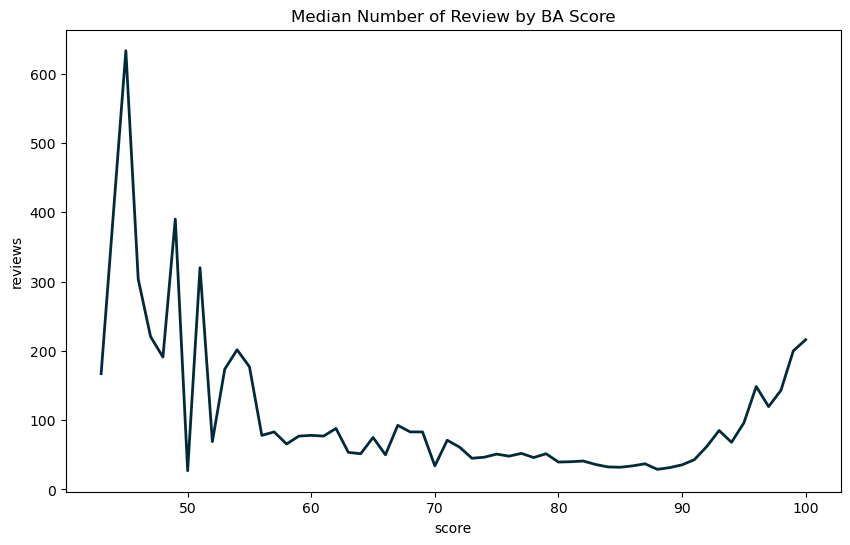

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=med_amount_rev_by_score, x='score', y='reviews', color='#022B3A', linewidth=2)
plt.title('Median Number of Review by BA Score');
#typically reviews tend to happen when the beer is really bad as opposed to really good

In [126]:
avg_score_by_type=beer.groupby(['type_'])['score'].mean()
avg_score_by_type = pd.DataFrame(avg_score_by_type).reset_index()

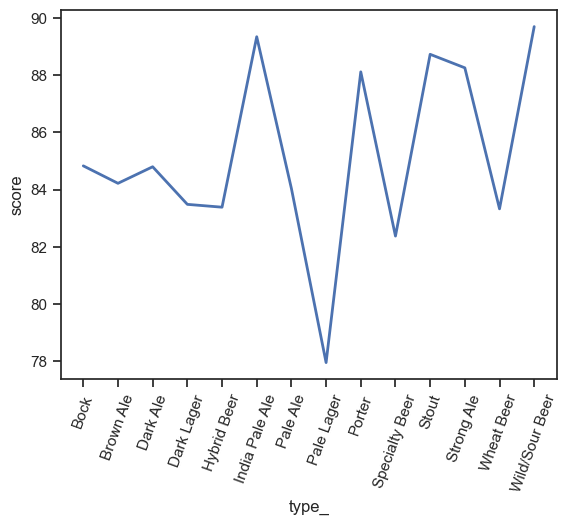

In [131]:
sns.lineplot(data=avg_score_by_type, x='type_', y='score', linewidth=2)
plt.xticks(rotation = 70);

/Users/amy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


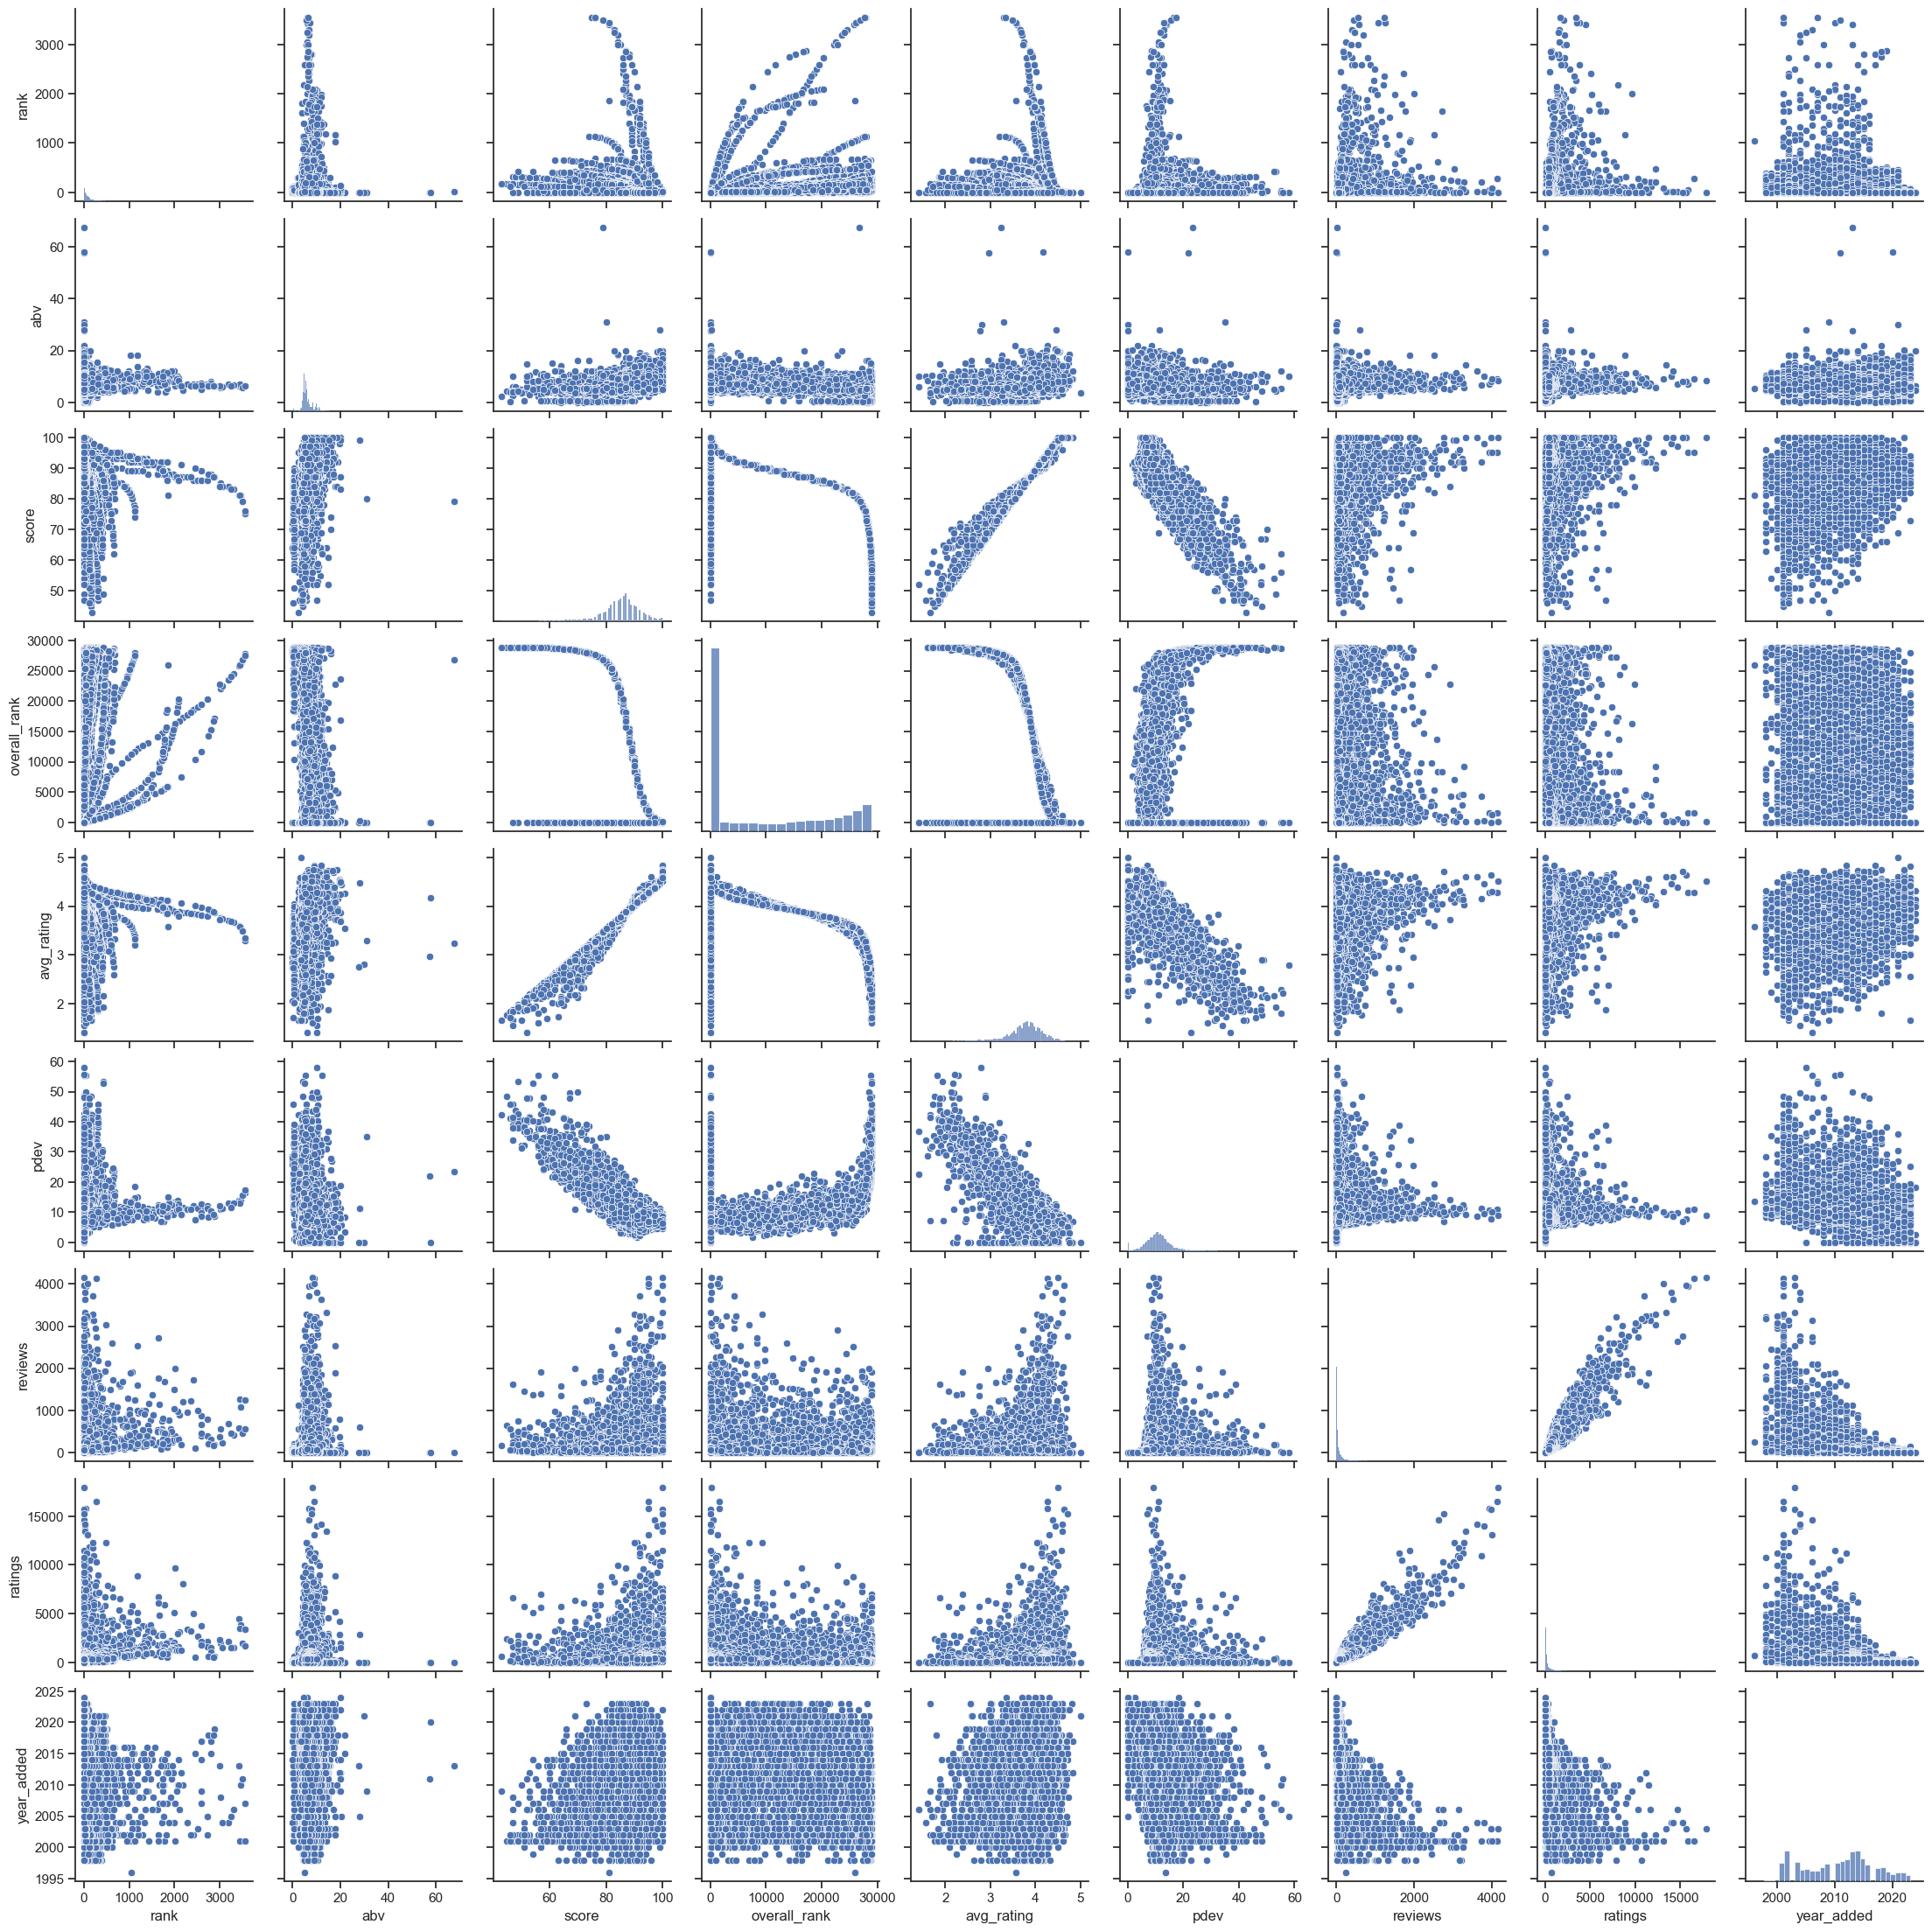

In [25]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(beer);

In [26]:
beer['score'].nunique()
# 57 different scores

57

In [27]:
score_100=beer.loc[beer['score']==100]
#looking at perfect scores

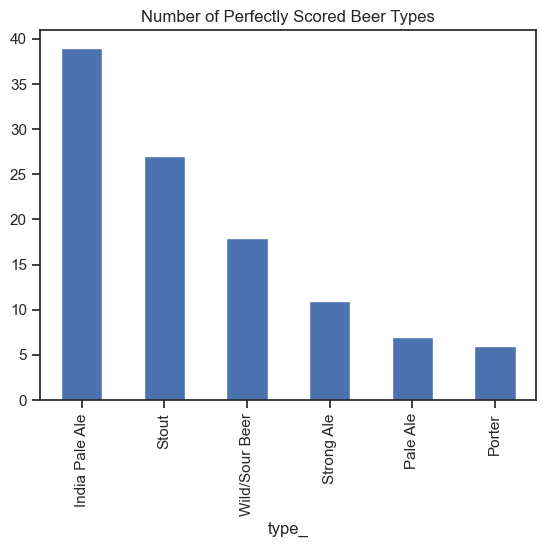

In [28]:
score_100['type_'].value_counts().plot(kind='bar')
plt.title('Number of Perfectly Scored Beer Types');
#India Pale Ale has more 100 scores

In [29]:
ipa_score_100=score_100.loc[score_100['type_']=='India Pale Ale']
#looking only India Pale Ales to see what subcategory scored perfectly 

In [118]:
avg_abv_by_type=score_100.groupby(['type_'])['abv'].mean()
avg_abv_by_type = pd.DataFrame(avg_abv_by_type).reset_index()

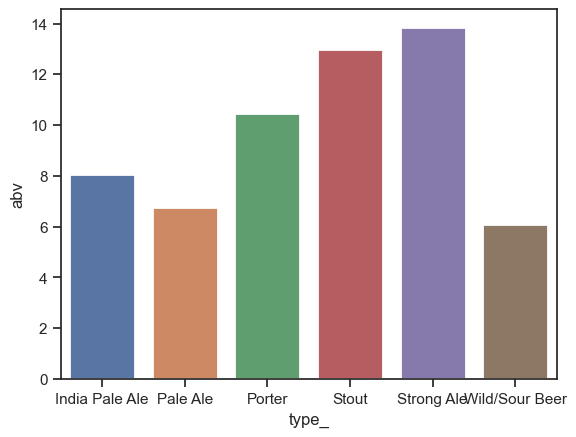

In [119]:
sns.barplot(data=abv_by_type, x='type_', y='abv', linewidth=2);

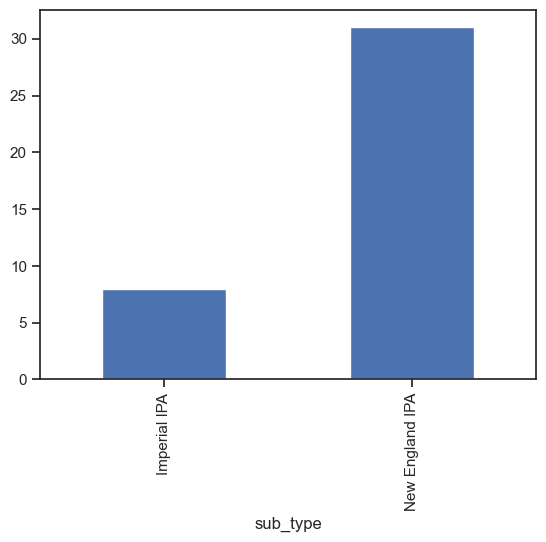

In [30]:
ipa_score_100.groupby('sub_type')['sub_type'].count().plot(kind='bar');
#New england and imperial ipa 

In [31]:
score_good=beer.loc[beer['score']>=90]
#Extneding the scope to "outstanding/exceptional/world class beers"

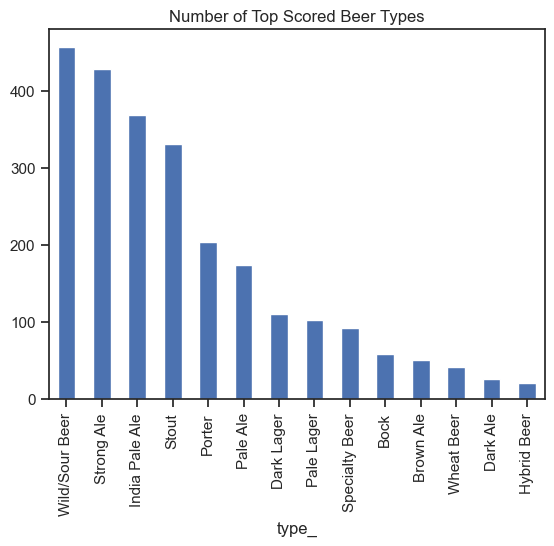

In [32]:
score_good['type_'].value_counts().plot(kind='bar')
plt.title('Number of Top Scored Beer Types');
#wild sour has more scores that indicate they are really liked

In [33]:
score_poorly=beer.loc[beer['score']<=69]

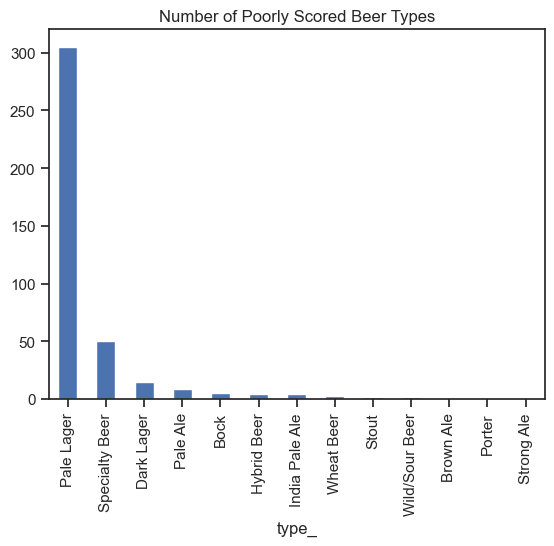

In [34]:
score_poorly['type_'].value_counts().plot(kind='bar')
plt.title('Number of Poorly Scored Beer Types');


In [35]:
score_terrible=beer.loc[beer['score']<=59]

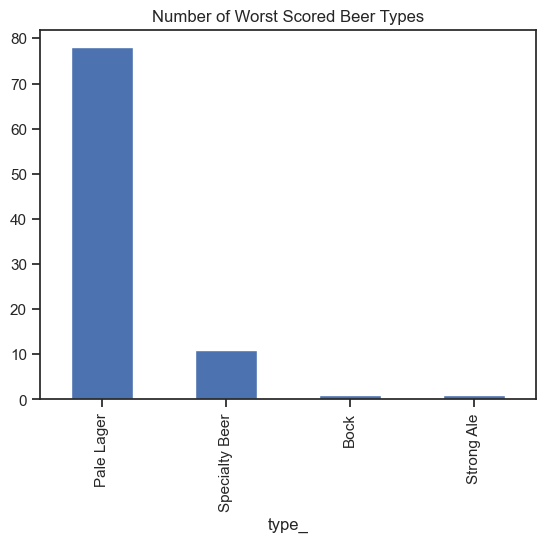

In [36]:
score_terrible['type_'].value_counts().plot(kind='bar')
plt.title('Number of Worst Scored Beer Types');

In [114]:
avg_abv_by_type=score_terrible.groupby(['type_'])['abv'].mean()
avg_abv_by_type_ter = pd.DataFrame(avg_abv_by_type).reset_index()

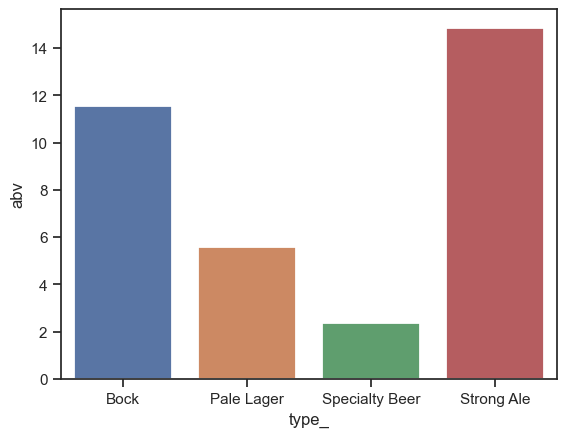

In [115]:
sns.barplot(data=avg_abv_by_type_ter, x='type_', y='abv', linewidth=2);

In [37]:
ter_pale_lager=score_terrible.loc[score_terrible['type_']=='Pale Lager']

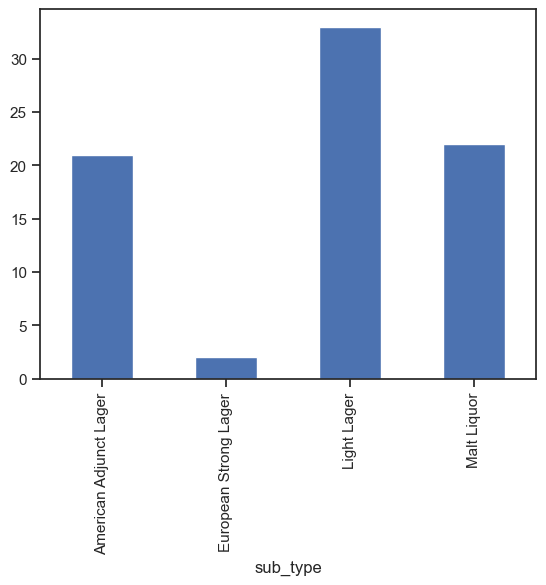

In [38]:
ter_pale_lager.groupby('sub_type')['sub_type'].count().plot(kind='bar');

In [74]:
beer.loc[beer['score']==43]

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
6219,Budweiser Select 55,Anheuser-Busch,"Missouri, United States",Light Lager,171,2.4,43.0,28885,1.65,42.42,167,630,Active,2009-09-09,Pale Lager,September,Wednesday,2009


##### Looking at time vs avg_rating:

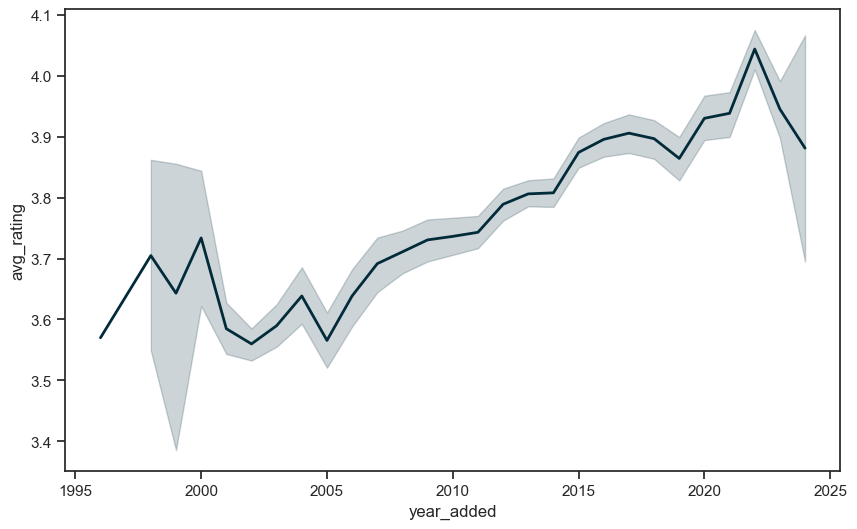

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=beer, x='year_added', y='avg_rating', color='#022B3A', linewidth=2);

#### Looking at ABV:

In [106]:
avg_abv_per_year=beer.groupby(['year_added'])['abv'].median()
avg_abv_per_year=pd.DataFrame(avg_abv_per_year).reset_index()

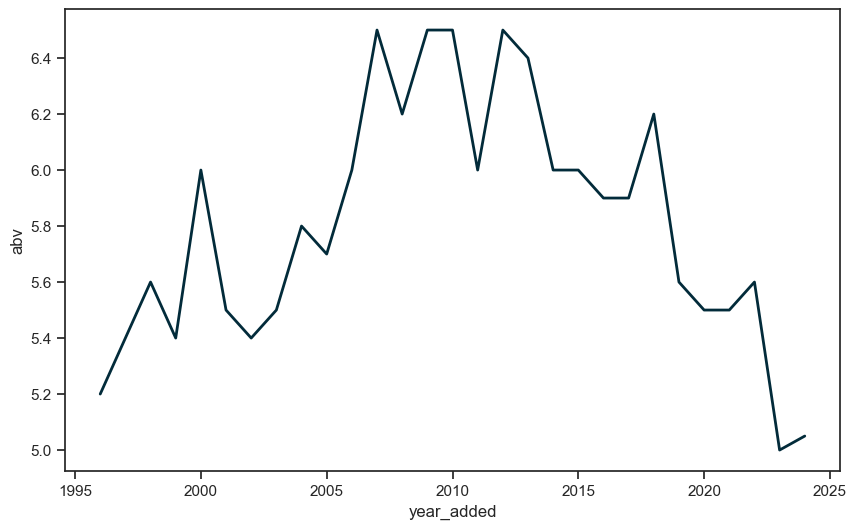

In [107]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_abv_per_year, x='year_added', y='abv', color='#022B3A', linewidth=2);

In [121]:
type_by_avg_abv=beer.groupby(['type_'])['abv'].mean()
type_by_avg_abv=pd.DataFrame(type_by_avg_abv).reset_index()

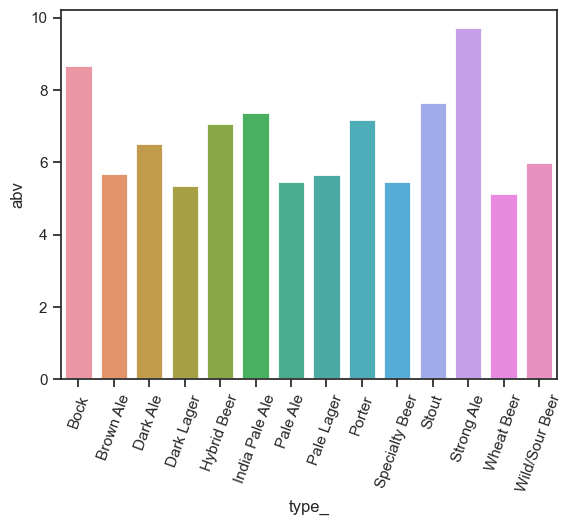

In [125]:
sns.barplot(data=type_by_avg_abv, x='type_', y='abv', linewidth=2)
plt.xticks(rotation = 70);

##### Looking at location:

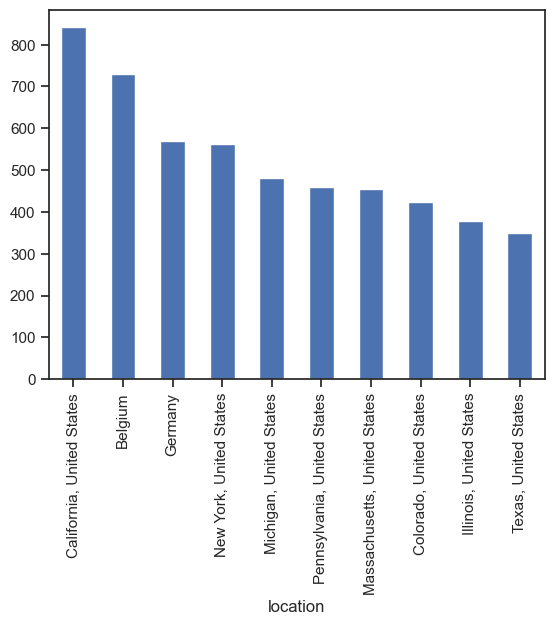

In [53]:
beer['location'].value_counts().head(10).plot(kind='bar');
#california, usa and belgium have more beers endemic to it listed on the site
# the us in general have more revied beers on the site, but the fact that germany and belgium are included is interesting

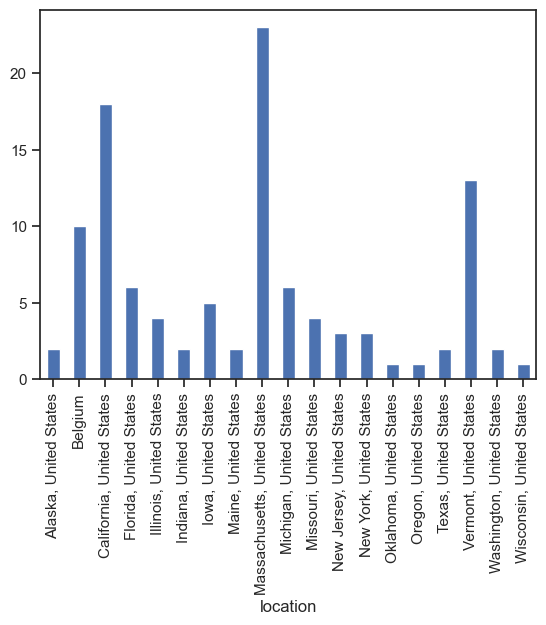

In [57]:
score_100.groupby('location')['location'].count().plot(kind ='bar');
#massachusetts

In [82]:
score_100.groupby('brewery')['brewery'].value_counts()
#Tree House Brewing Company// 16// in Massachusetts, United States

brewery
3 Floyds Brewing Co.                                           2
AleSmith Brewing Company                                       2
Alpine Beer Company                                            1
Anchorage Brewing Company                                      2
Bell's Brewery - Eccentric Café & General Store                1
Bissell Brothers Brewing Co.                                   1
Bottle Logic Brewing                                           1
Brasserie Cantillon                                            6
Brouwerij 3 Fonteinen                                          3
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren)     1
Central Waters Brewing Co.                                     1
Cigar City Brewing                                             2
Dark Horse Brewing Company                                     1
Firestone Walker Brewing Co.                                   3
Founders Brewing Company                                       3
Fremont Brewing C

In [83]:
score_100.loc[score_100['brewery']=='Tree House Brewing Company'].head(1)
# looking for location

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
3400,Julius,Tree House Brewing Company,"Massachusetts, United States",New England IPA,5,6.8,100.0,28,4.65,6.67,826,5073,Active,2012-10-17,India Pale Ale,October,Wednesday,2012


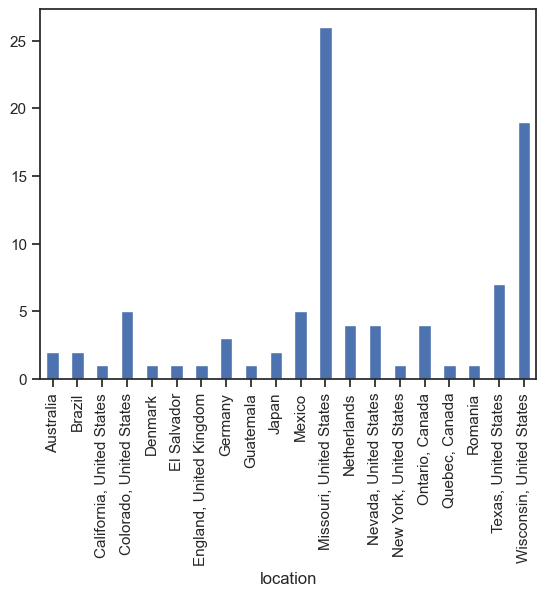

In [77]:
score_terrible.groupby('location')['location'].count().plot(kind ='bar');
#missouri

In [81]:
score_terrible.groupby('brewery')['brewery'].value_counts()
#Anheuser-Busch// 25// in Missouri, United States 

brewery
Amstel Brouwerij B. V.                              1
Anheuser-Busch                                     25
Brauerei Beck & Co.                                 2
Camo Brewing Company                                4
Carlton & United Breweries, Ltd.                    2
Cerveceria La Constancia S.A. / BevCo Ltd           1
Cervecería Centro Americana, S.A.                   1
Cervecería Cuauhtémoc Moctezuma, S.A. de C.V.       2
Cervejarias Reunidas Skol-Caracu                    1
City Brewing Company, LLC                           2
Companhia Cervejaria Brahma                         1
Coors Brewing Company (Molson-Coors)                5
Copper Mountain Beverage Company                    1
Crest Brewing Company                               1
Genesee Brewing Co. / Dundee Brewing Co.            1
Grolsch Bierbrouwerij N.V.                          1
Grupo Modelo S.A. de C.V.                           3
Heineken Nederland B.V.                             2
Kirin Brewery Compan

In [87]:
score_terrible.loc[score_terrible['brewery']=='Anheuser-Busch'].head(1)

,name,brewery,location,sub_type,rank,abv,score,overall_rank,avg_rating,pdev,reviews,ratings,status,date_added,type_,month_added,day_added,year_added
4900,Budweiser,Anheuser-Busch,"Missouri, United States",American Adjunct Lager,286,5.0,57.0,28831,2.38,34.03,1910,6981,Active,2000-11-21,Pale Lager,November,Tuesday,2000


#### Looking at pdev

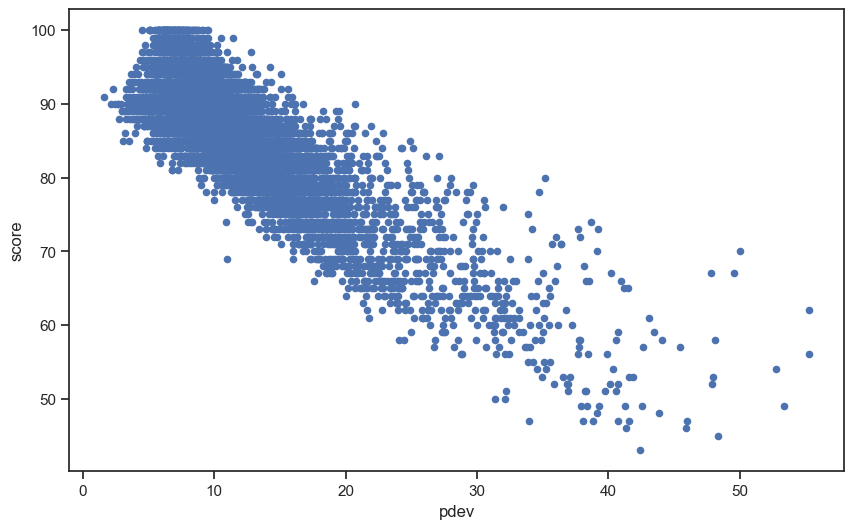

In [132]:
beer.plot(kind = 'scatter',
             x = 'pdev',
             y = 'score',
             figsize = (10,6));